In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
order_df = pd.read_csv("trade_data.csv", index_col=0).dropna()

In [3]:
order_df.head()

,timestamp,symbol,trade_price,trade_size,bid,ask
0,100,PEARLS,10002.0,1.0,"{9995: 30, 9996: 1}","{10002: -6, 10004: -1, 10005: -30}"
1,200,PEARLS,10002.0,1.0,"{9995: 21, 9996: 1}","{10004: -1, 10005: -21}"
2,300,PEARLS,10002.0,1.0,"{9995: 23, 9996: 2}","{9998: -3, 10004: -2, 10005: -23}"
3,400,PEARLS,9998.0,2.0,"{9995: 23, 9996: 2, 9998: 5}","{10004: -2, 10005: -23}"
4,400,PEARLS,9998.0,1.0,"{9995: 23, 9996: 2, 9998: 5}","{10004: -2, 10005: -23}"


In [4]:
# we have the bid column as a dictionary of bid price and bid size
# we want to unroll the dictionary into column like best_bid_1, best_bid_2, best_bid_3, best_bid_4, best_bid_5 and  best_bid_1_size, best_bid_2_size, best_bid_3_size, best_bid_4_size, best_bid_5_size
# similarly for ask, we also wanna unroll it

def unroll_order_depth(df):
    side = ["bid", "ask"]
    for s in side:
        if s == "bid":
            df[s+"price_ls"] = df[s].apply(lambda x:list(eval(x).keys())[::-1])
        else:
            df[s+"price_ls"] = df[s].apply(lambda x:list(eval(x).keys()))
        df[s+'size_ls'] = df.apply(lambda x: list(eval(x[s])[key] for key in x[s+"price_ls"]), axis=1)
        for i in range(5):
            df[s+"_"+str(i+1)] = df[s+"price_ls"].apply(lambda x: x[i] if len(x)>i else np.nan)
            df[s+"_"+str(i+1)+"_size"] = df[s+"size_ls"].apply(lambda x: x[i] if len(x)>i else np.nan)
    df = df.drop(columns=["bid", "ask", "bidprice_ls", "askprice_ls", "bidsize_ls", "asksize_ls"])

    return df


In [5]:
temp = order_df.pipe(unroll_order_depth)

In [6]:
def plot_orderbook(df):
    for symbol in df['symbol'].unique():
        df_symbol = df[df['symbol'] == symbol]
        fig, ax = plt.subplots(figsize=(30, 12))
        # ax.plot(df_symbol['timestamp'], df_symbol['trade_price'],'blue', label='trade_price')
        ax.plot(df_symbol['timestamp'], df_symbol['bid_1'], 'green', label='best_bid_1')
        ax.plot(df_symbol['timestamp'], df_symbol['ask_1'], 'red', label='best_ask_1')
        # cancel scientific notation for the y axis
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        ax.set_title('Orderbook for ' + symbol)
        plt.show()

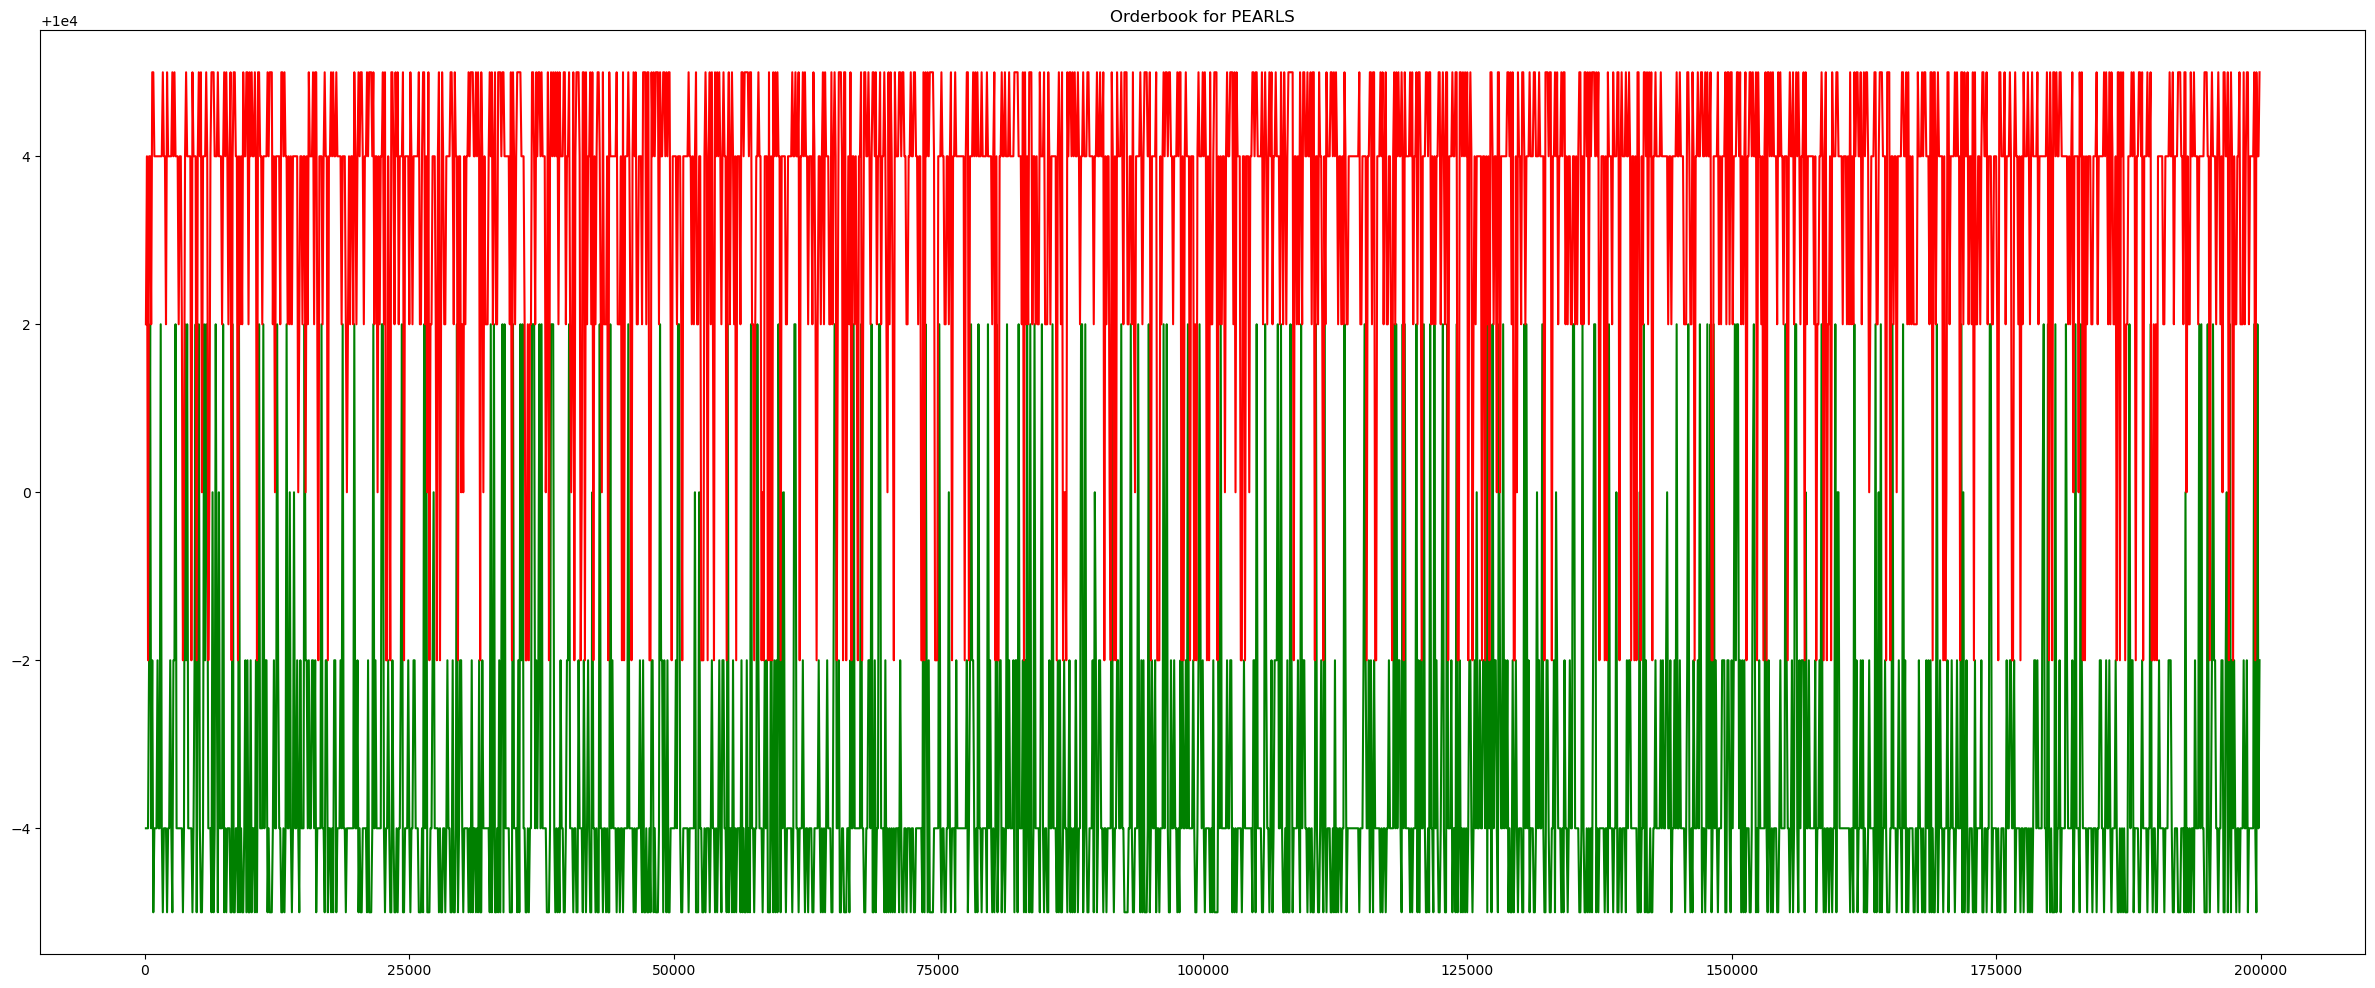

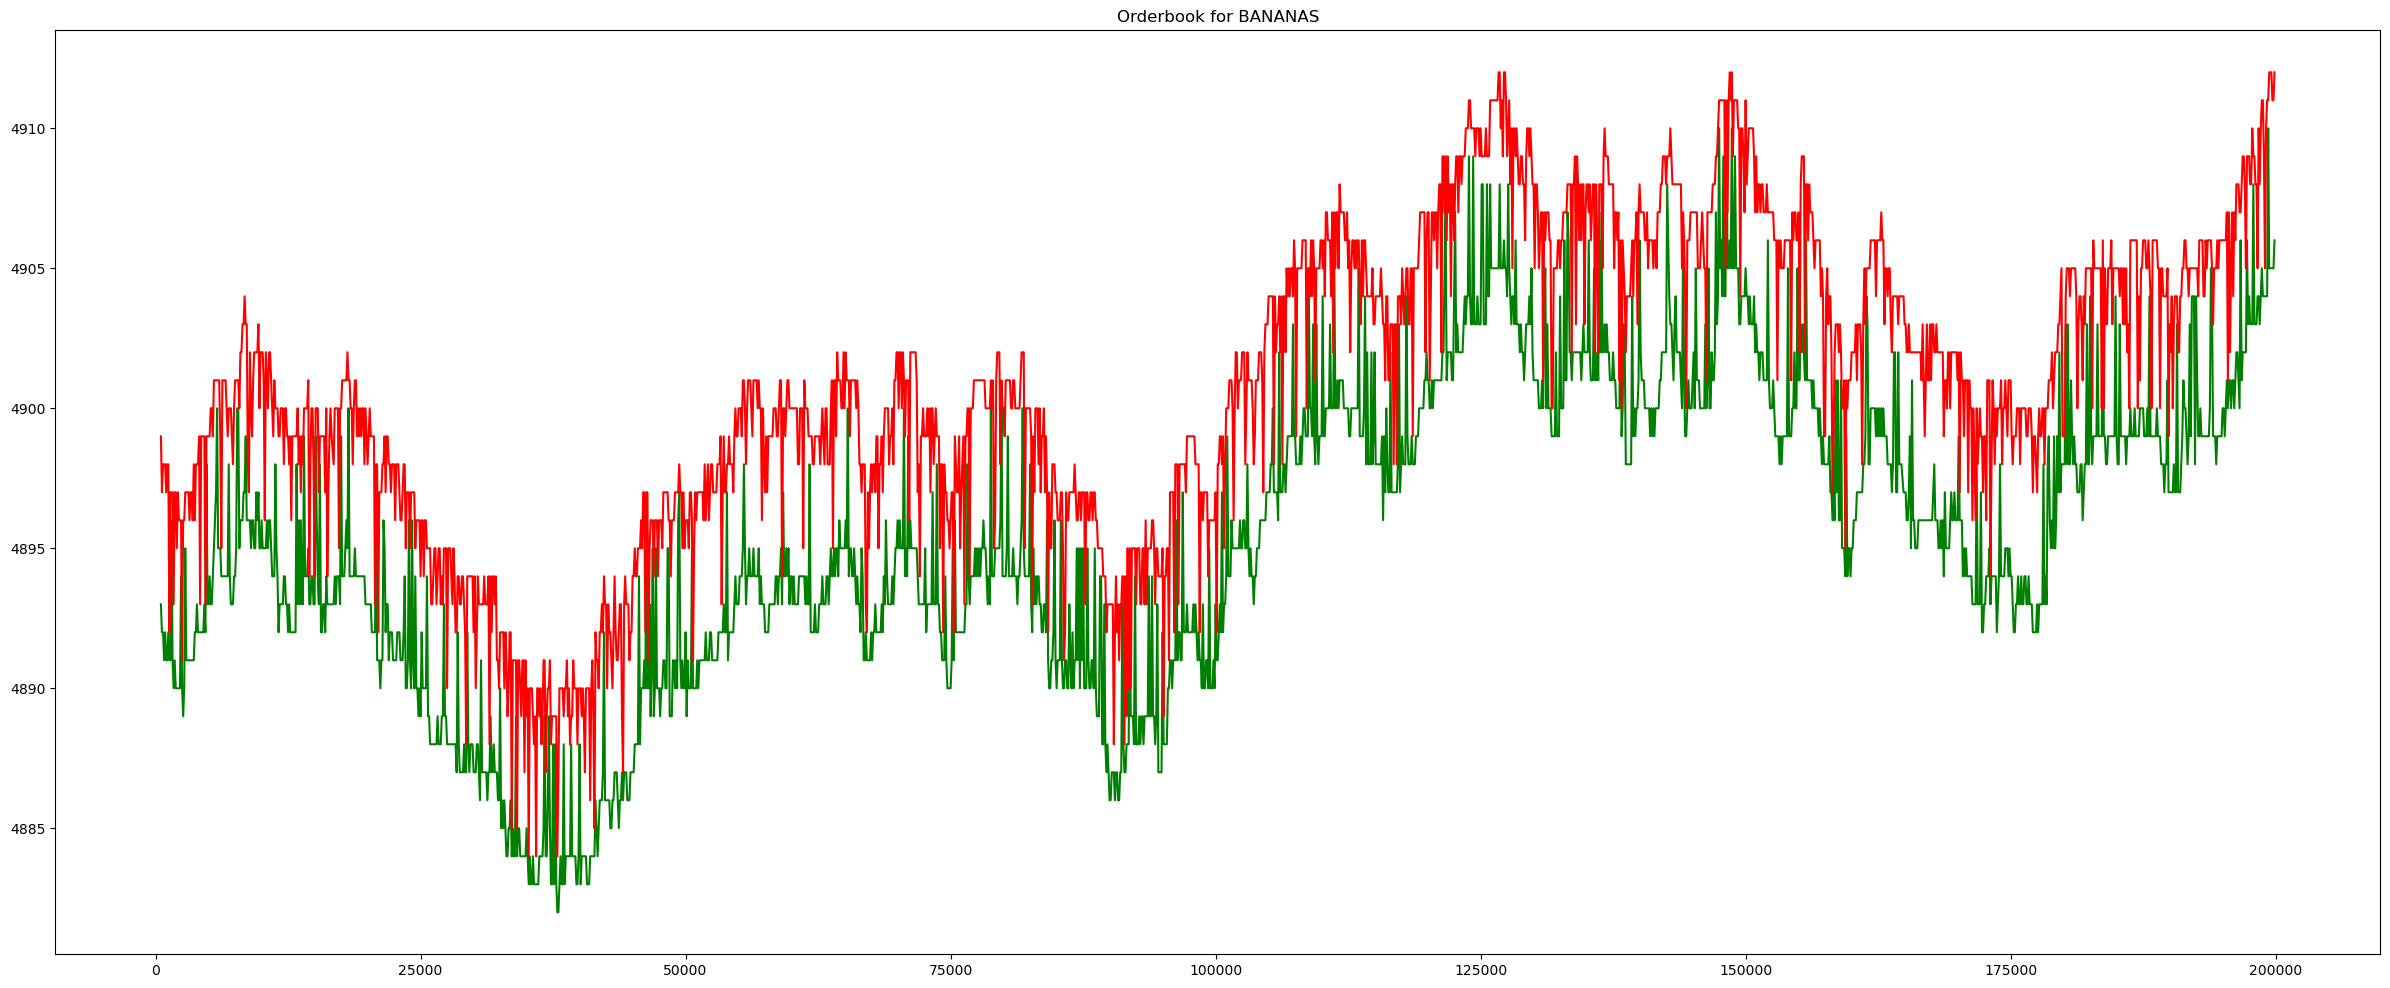

In [7]:
plot_orderbook(temp)

For the banana, we see that in a micro level, it's still mean-reverse, but in a macro level, it's not, more likely to be a brownian motion. So we can use a more complex strategy to trade it, like stoikov marketmaking strategy. We can use this historical data as to estimate the parameters and try it in backtest.

In [12]:
# save the data
temp.to_csv("orderbook.csv")